# Go-to-Market strategy insight for Cab Investment firm

## Project Description:

<p>XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.</p>

## Data Set:

You have been provided `4` individual data sets. Time period of data is from `31/01/2016` to `31/12/2018.`
    
Below are the list of datasets which are provided for the analysis:

`Cab_Data.csv` – this file includes details of transaction for `2` cab companies

`Customer_ID.csv` – this is a mapping table that contains a unique identifier which links the customer’s demographic details

`Transaction_ID.csv` – this is a mapping table that contains transaction to customer mapping and payment mode

`City.csv` – this file contains list of US cities, their population and number of cab users

## Project Tasks: 

- [X] Review the Source Documentation
- [X] Understand the field names and data types
- [X] Identify relationships across the files
- [X] Field/feature transformations
- [X] Determine which files should be joined versus which ones should be appended
- [X] Create master data and explain the relationship
- [X] Identify and remove duplicates
- [X] Perform other analysis like NA value and outlier detection


## Import required Libraries

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
import xlrd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

## Read in Dataset

In [108]:
Cab_Data = pd.read_csv('G2M_DataSets/Cab_Data.csv')
City = pd.read_csv("G2M_DataSets/City.csv")
Customer_ID =  pd.read_csv("G2M_DataSets/Customer_ID.csv")
Transaction_ID = pd.read_csv("G2M_DataSets/Transaction_ID.csv")

### Overview of Cab dataset

In [109]:
# Overview of the Cab data to inspect
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [110]:
# Shape of the Cab data to inspect
print("Shape of Cab_Data", Cab_Data.shape)

Shape of Cab_Data (359392, 7)


In [111]:
# Summary of the Cab data to inspect
print(Cab_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


`Data wrangling`: `'Date_of_Travel'` needs to be converted from `int64` into to the `datetime`

In [112]:
#Customer_ID dataset to COLUMN name to inspect
Cab_Data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

##### Cleaning Cab_data dataset

We now need to clean our data. 

- Column names. Specifically, the special characters " " needs to be replaced by "_".

For example: `'Transaction ID'`, `'Date of Travel'`, `'KM Travelled'`,
       `'Price Charged'`, `'Cost of Trip'` needs to converted as `'Transaction_ID'`, `'Date_of_Travel'`, `'KM_Travelled'`,
       `'Price_Charged'`, `'Cost_of_Trip'`.
       

In [113]:
# Loop for each column name to clean
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [114]:
#Cleaned version
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [115]:
#Converted version
Cab_Data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [116]:
#checking  duplicate values 
Cab_Data.duplicated().sum()

0

In [118]:
#checks for null values
Cab_Data.isnull().sum()

Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64

### Overview of City dataset

In [119]:
# Overview of the City data to inspect
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [120]:
# Shape of the Cab data to inspect
print("Shape of City dataset", City.shape)

Shape of City dataset (20, 3)


In [121]:
# Summary of the City dataset to inspect
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


In [122]:
#City dataset to COLUMN name to inspect
City.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [123]:
#checking  duplicate values 
City.duplicated().sum()

0

In [124]:
#checks for null values
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Overview of Customer_ID dataset

In [125]:
# Overview of the Customer_ID to inspect
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [126]:
# Shape of the Customer_ID dataset to inspect
print("Shape of Customer_ID", Customer_ID.shape)

Shape of Customer_ID (49171, 4)


In [127]:
# Summary of the City dataset to inspect
print(Customer_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [128]:
#Customer_ID dataset to COLUMN name to inspect
Customer_ID.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [129]:
#checking  duplicate values 
Customer_ID.duplicated().sum()

0

In [130]:
#checks for null values
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

##### Cleaning Customer_ID dataset

We now need to clean our data Column names. Specifically, the special characters `" "` needs to be replaced by `"_"`.

For example: `'Customer ID'`, `'Income (USD/Month)'` needs to converted as `'Customer_ID'`, `'Income_(USD/Month)'`.


In [131]:
# Loop for each column name to clean
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [132]:
#Cleaned version
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

### Overview of Transaction_ID dataset

In [133]:
# Overview of the Customer_ID to inspect
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [134]:
# Shape of the Transaction_ID dataset to inspect
print("Shape of Transaction_ID", Transaction_ID.shape)

Shape of Transaction_ID (440098, 3)


In [135]:
# Summary of the Transaction_ID dataset to inspect
print(Transaction_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


In [136]:
#Transaction_ID dataset to COLUMN name to inspect
Transaction_ID.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [137]:
#checking  duplicate values 
Transaction_ID.duplicated().sum()

0

In [138]:
#checks for null values
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

##### Cleaning Transaction_ID dataset

We now need to clean our data Column names. Specifically, the special characters `" "` needs to be replaced by `"_"`.

For example: `'Transaction ID'`, `'Customer ID'` needs to converted as `'Transaction_ID'`, `'Customer_ID'`.


In [139]:
# Loop for each column name to clean
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [140]:
#Cleaned version
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

## Merging datasets

- [x] Determine which files should be joined versus which ones should be appended

Join `Transaction_ID` dataset into `Customer_ID` dataset on `Customer_ID`, and Cab_Data on `Transaction_ID`.


In [141]:
#Merge 3 dataset cab, trans, cus into df_merge
df_merge = Transaction_ID.merge(Customer_ID, on="Customer_ID").merge(Cab_Data, on="Transaction_ID")

#Use regex to remove "," with replace and astype to change string to int for Population and users
user_df= City
user_df[['Population','Users']]= user_df[['Population','Users']].replace(r'\D+', '', regex=True).astype('int64')

In [142]:
df_merge.head()

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


##### Checking merged dataset on `info()` and `isnull()` missing values

In [143]:
#Summary
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Customer_ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income_(USD/Month)  359392 non-null  int64  
 6   Date_of_Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM_Travelled        359392 non-null  float64
 10  Price_Charged       359392 non-null  float64
 11  Cost_of_Trip        359392 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


In [144]:
#checks for null values
df_merge.isnull().sum()

Transaction_ID        0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
dtype: int64

#### Extracting  Year, Month and Day from DataFrame

In [148]:
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
    
df_merge['Date_of_Travel'] = pd.to_datetime(df_merge['Date_of_Travel'].apply(read_date), errors='coerce', format='%Y-%m-%d')

In [150]:
#Create Month and year column to get data from Date column
months=[]
years =[]
for i in range(len(df_merge['Date_of_Travel'])):
    months.append(df_merge['Date_of_Travel'][i].month)
    years.append(df_merge['Date_of_Travel'][i].year)
df_merge['Month'] = months
df_merge['Year'] = years
df_merge['Day_of_Week'] = df_merge['Date_of_Travel'].dt.day_name()

In [151]:
df_merge.head()

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day_of_Week
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Friday
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,Saturday
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,Friday
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Wednesday
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,Saturday


In [152]:
#adding a new column of margin
df_merge['Margin']=df_merge['Price_Charged']-df_merge['Cost_of_Trip']

In [153]:
df_merge.head()

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day_of_Week,Margin
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Friday,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,Saturday,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,Friday,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Wednesday,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,Saturday,253.9808


## Exploring Cab companies business performance. 
We are going to talk about key indicators that will help you make decisions on how to invest in cab business going forward. This will help us understand the kinds of company we will move forward with and invest in.

Key indicators are often referred to as KPIs, or key performance indicators. These are critical and measurable indicators that help you measure a desired result.

**What are some common and important examples of KPIs?**

- Net profit
- Revenue growth
- Customer retention
- Time to market
- Sales lifecycle time

**This brings us to the following questions:**

- Which company is the most profitable? 
- Revenue growth rate?
- Which company has the highest average revenue per user (ARPU) ?
- Which company has the highest share of the market?
- Which company has the highest number of active customer ? 
- Which company has the lowest churn rate? 
- Explore customer travel behaviors, patterns by week, month, year?

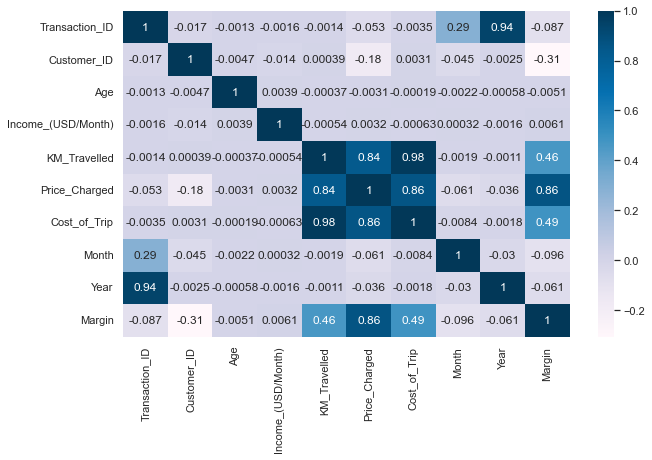

In [154]:
# checking the correlation in order  to identify multicollinearity, an absolute value of 0.5 shows high correlation
plt.subplots(figsize=(10,6))
sns.heatmap(df_merge.corr(), cmap='PuBu', annot=True)
plt.show()

In [155]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
Pink_Cab = df_merge[df_merge['Company']=='Pink Cab']
Yellow_Cab = df_merge[df_merge['Company']=='Yellow Cab']

### 1. Which company is the most profitable?

 The Margin/profit generated in the business is the perfect indicator to measure on how well the business is performing

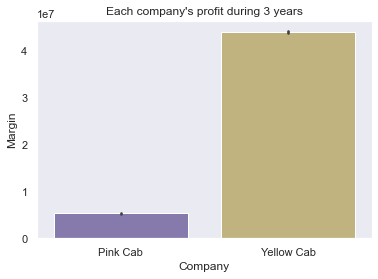

<Figure size 432x288 with 0 Axes>

In [171]:
sns.set_style("dark")
sns.barplot(x="Company", y="Margin", palette={"Pink Cab": "m", "Yellow Cab": "y"}, data=df_merge, estimator=sum,)
plt.title("Each company's profit during 3 years")

plt.show()
plt.clf()

**Insight:The Yellow cab generated the highest profits in three years, and `8.2` times more than Pink cab.**

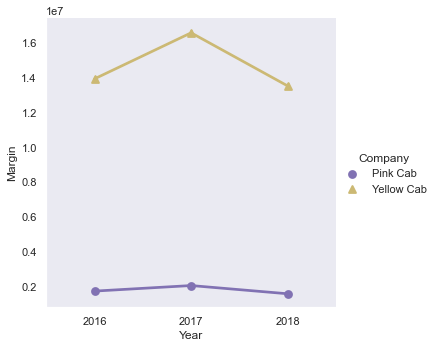

In [170]:
#Profit by Year
sns.set_style("dark")
sns.catplot(x="Year", y="Margin", hue="Company",
            palette={"Yellow Cab": "y", "Pink Cab": "m"},
            markers=["o", "^"], linestyles=["-", "-"],
            kind="point", estimator=sum, data=df_merge)

**Insight: Yellow company profit skyrocketed in 2017, followed by a sharp decrease in 2018.
On other hand, Pink company profit remains steady all over time.**

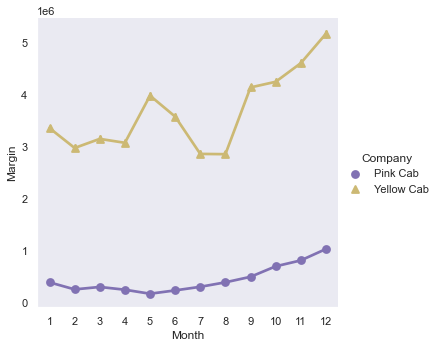

In [201]:
#Profit by Months
sns.set_style("dark")
sns.catplot(x="Month", y="Margin", hue="Company",
            palette={"Yellow Cab": "y", "Pink Cab": "m"},
            markers=["o", "^"], linestyles=["-", "-"],
            kind="point", estimator=sum, data=df_merge)

**Insight: We can see seasonal increase profit pattern from AUGUST to December.** 

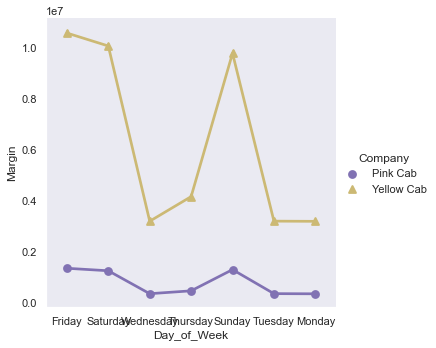

In [205]:
#Profit by Week days
sns.set_style("dark")
sns.catplot(x="Day_of_Week", y="Margin", hue="Company",
            palette={"Yellow Cab": "y", "Pink Cab": "m"},
            markers=["o", "^"], linestyles=["-", "-"],
            kind="point", estimator=sum, data=df_merge)

**Insight: Yellow cab's profit started to `increase from Wednesday day to reach a peak on Friday` and decrease slowly to Sunday. In contrast Pink Cab had a stable profit in everyday of a week with the slightly `increase from Thursday to Friday`.**

### 2. Which company has the highest average revenue per user (ARPU) ?

In [234]:
#Groupby Year, and Company
ARPU_df = df_merge.groupby(["Company", "Year"]).agg({'Price_Charged': sum, "Customer_ID" : "count"})

In [236]:
ARPU_df.head(10)

Price_Charged  Customer_ID    ARPU
Company    Year                                    
Pink Cab   2016     7908479.23        25080  315.33
           2017     9578629.54        30321  315.91
           2018     8841142.56        29310  301.64
Yellow Cab 2016    38481133.18        82239  467.92
           2017    45818910.04        98189  466.64
           2018    41553843.97        94253  440.88

In [242]:
# Average revenue per user (ARPU)
ARPU_df['ARPU']= round(ARPU_df['Price_Charged'] / ARPU_df['Customer_ID'],2)

In [243]:
ARPU= ARPU_df.reset_index()

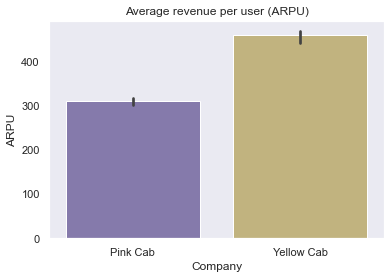

<Figure size 432x288 with 0 Axes>

In [245]:
sns.set_style("dark")
sns.barplot(x="Company", y="ARPU", palette={"Pink Cab": "m", "Yellow Cab": "y"}, data=ARPU)
plt.title("Average revenue per user (ARPU)")

plt.show()
plt.clf()

In [246]:
ARPU.head(10)

,Company,Year,Price_Charged,Customer_ID,ARPU
0,Pink Cab,2016,7908479.23,25080,315.33
1,Pink Cab,2017,9578629.54,30321,315.91
2,Pink Cab,2018,8841142.56,29310,301.64
3,Yellow Cab,2016,38481133.18,82239,467.92
4,Yellow Cab,2017,45818910.04,98189,466.64
5,Yellow Cab,2018,41553843.97,94253,440.88


In [260]:
arpu_c= ARPU.groupby(['Company']).agg({'ARPU': "mean"})

In [261]:
arpu_c.head()

,ARPU
Company,
Pink Cab,310.96
Yellow Cab,458.48


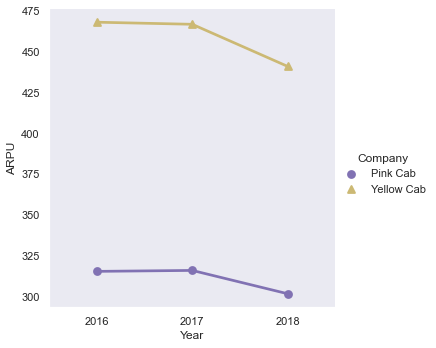

In [251]:
sns.catplot(x="Year", y="ARPU", hue="Company",
            palette={"Yellow Cab": "y", "Pink Cab": "m"},
            markers=["o", "^"], linestyles=["-", "-"],
            kind="point", data=ARPU)

### Conclusion
After careful analysis, we highly suggest to invest in Yellow Cab rather than Pink Cab for a better and safer investment. 

Firstly, Yellow Cab clearly is leading, generated `8.2` times more profit than Pink cab in 3 years. 
One of the main reason for Yellow Cab's profit was because of their high ARPU `$458`, and `94K` of active customers in `2018`.
on other hand Pink Cab is ARPU is `$310`, they have `29K` active customers in `2018`. 

Secondly,
Last but not least, Pink Cab is the most favorite for customers for their first ride while customers tend to pick yellow cab after 7 trips riding with both cab companies.